In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
squared = lambda x: x**2
squared(3)

9

In [3]:
def squared_regular(x) :
    x = x**2
    return(x)

squared_regular(4)

16

In [4]:
interpolated_data = pd.read_csv('data/world_development_data_interpolated.csv')
imputed_data = pd.read_csv('data/world_development_data_imputed.csv')

In [5]:
interpolated_data.shape

(9947, 33)

In [6]:
interpolated_data.head()

,Year,Country,Region,SubRegion,IntermRegion,SurfAreaSqKm,PopDens,PopGrowth%,GDP,GDPGrowth%,...,MerchTrade%GDP,MilExp%GDP,MobileSubs/100,MortRateU5,NetMigr,PopTotal,RevenueExGrants%GDP,SchEnrollPrim%,TaxRevenue%GDP,UrbanPopGrowth%
0,1973,Afghanistan,Asia,Southern Asia,NaN,652860.0,17.747275,2.524421,1.733333e+09,NaN,...,18.173078,1.868910,NaN,285.2,-3030.0,11575305.0,NaN,35.214371,NaN,5.688982
1,1973,Netherlands,Europe,Western Europe,NaN,41530.0,398.084182,0.827331,7.184091e+10,5.444223,...,78.083644,2.702997,NaN,14.1,31535.0,13439322.0,38.294098,100.047302,22.460626,1.337022
2,1973,Poland,Europe,Eastern Europe,NaN,312690.0,108.907245,0.908114,NaN,NaN,...,NaN,NaN,NaN,30.5,-28055.0,33357200.0,NaN,105.338722,NaN,2.125265
3,1973,"Egypt, Arab Rep.",Africa,Northern Africa,NaN,1001450.0,37.290448,2.151183,1.009853e+10,3.506830,...,20.161341,13.513514,NaN,232.5,-112685.0,37120776.0,NaN,70.221947,NaN,3.007695
4,1973,Gabon,Africa,Sub-Saharan Africa,Middle Africa,267670.0,2.465510,2.067382,7.227807e+08,10.182434,...,72.082722,1.303538,NaN,149.4,613.0,635288.0,NaN,130.283417,NaN,7.959430


In [7]:
growth_adjustment_factor = 1.05  # 5% increase
interpolated_data['Adjusted_GDPGrowth%'] = interpolated_data['GDPGrowth%'].dropna().map(lambda x: x * growth_adjustment_factor)

In [8]:
interpolated_data.head(3)

,Year,Country,Region,SubRegion,IntermRegion,SurfAreaSqKm,PopDens,PopGrowth%,GDP,GDPGrowth%,...,MilExp%GDP,MobileSubs/100,MortRateU5,NetMigr,PopTotal,RevenueExGrants%GDP,SchEnrollPrim%,TaxRevenue%GDP,UrbanPopGrowth%,Adjusted_GDPGrowth%
0,1973,Afghanistan,Asia,Southern Asia,NaN,652860.0,17.747275,2.524421,1.733333e+09,NaN,...,1.868910,NaN,285.2,-3030.0,11575305.0,NaN,35.214371,NaN,5.688982,NaN
1,1973,Netherlands,Europe,Western Europe,NaN,41530.0,398.084182,0.827331,7.184091e+10,5.444223,...,2.702997,NaN,14.1,31535.0,13439322.0,38.294098,100.047302,22.460626,1.337022,5.716434
2,1973,Poland,Europe,Eastern Europe,NaN,312690.0,108.907245,0.908114,NaN,NaN,...,NaN,NaN,30.5,-28055.0,33357200.0,NaN,105.338722,NaN,2.125265,NaN


In [9]:
lowest_gdp_growth_data = interpolated_data[['Adjusted_GDPGrowth%', 'Country']].sort_values(by='Adjusted_GDPGrowth%', ascending=True).dropna().head(10)
lowest_gdp_growth_data.head()

,Adjusted_GDPGrowth%,Country
3660,-67.249462,Iraq
9634,-56.947695,"Macao SAR, China"
7831,-52.855441,Libya
4310,-52.760470,Rwanda
3892,-47.144999,Georgia


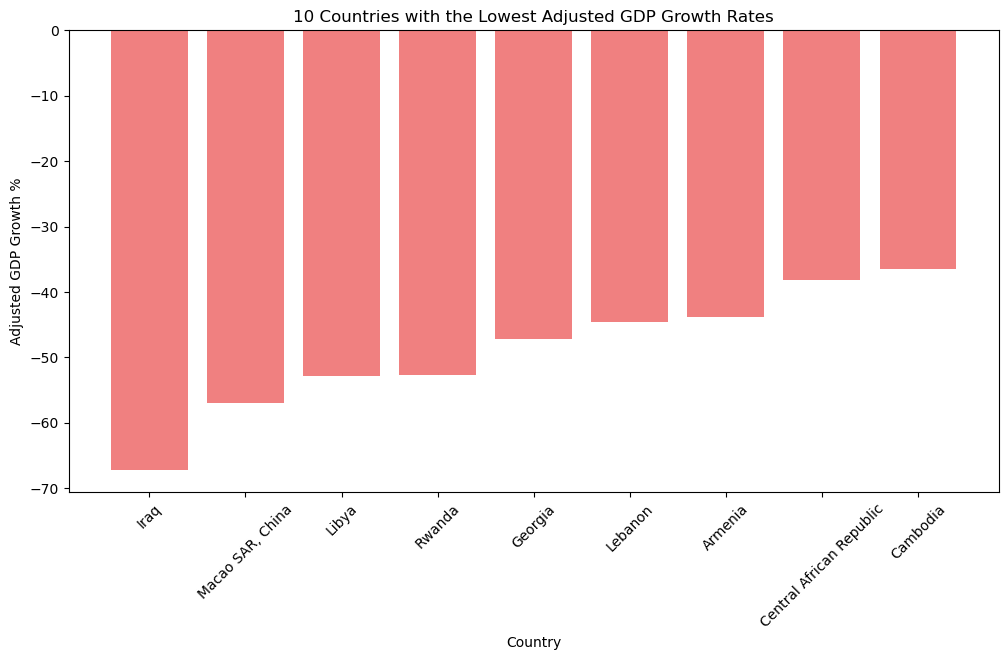

In [10]:
plt.figure(figsize=(12, 6))
plt.bar(lowest_gdp_growth_data['Country'], lowest_gdp_growth_data['Adjusted_GDPGrowth%'], color='lightcoral')
plt.xlabel('Country')
plt.ylabel('Adjusted GDP Growth %')
plt.title('10 Countries with the Lowest Adjusted GDP Growth Rates')
plt.xticks(rotation=45)
plt.show()

In [11]:
max_urban_growth = interpolated_data['UrbanPopGrowth%'].max()
max_density = imputed_data['PopDens'].max()

In [12]:
urban_growth_normalizer = lambda x: x / max_urban_growth if pd.notnull(x) else None
density_normalizer = lambda x: x / max_density if pd.notnull(x) else None

interpolated_data['Normalized_UrbanGrowth'] = interpolated_data['UrbanPopGrowth%'].map(urban_growth_normalizer)
imputed_data['Normalized_PopDens'] = imputed_data['PopDens'].map(density_normalizer)

In [13]:
print(urban_growth_normalizer)
print(density_normalizer)

<function <lambda> at 0x00000215DA1BDBD0>
<function <lambda> at 0x00000215DA1BDB40>


In [14]:
interpolated_data.head(3)

,Year,Country,Region,SubRegion,IntermRegion,SurfAreaSqKm,PopDens,PopGrowth%,GDP,GDPGrowth%,...,MobileSubs/100,MortRateU5,NetMigr,PopTotal,RevenueExGrants%GDP,SchEnrollPrim%,TaxRevenue%GDP,UrbanPopGrowth%,Adjusted_GDPGrowth%,Normalized_UrbanGrowth
0,1973,Afghanistan,Asia,Southern Asia,NaN,652860.0,17.747275,2.524421,1.733333e+09,NaN,...,NaN,285.2,-3030.0,11575305.0,NaN,35.214371,NaN,5.688982,NaN,0.108410
1,1973,Netherlands,Europe,Western Europe,NaN,41530.0,398.084182,0.827331,7.184091e+10,5.444223,...,NaN,14.1,31535.0,13439322.0,38.294098,100.047302,22.460626,1.337022,5.716434,0.025479
2,1973,Poland,Europe,Eastern Europe,NaN,312690.0,108.907245,0.908114,NaN,NaN,...,NaN,30.5,-28055.0,33357200.0,NaN,105.338722,NaN,2.125265,NaN,0.040499


In [15]:
imputed_data.head(3)

,Year,Country,Region,SubRegion,SurfAreaSqKm,PopTotal,PopDens,PopGrowth%,GDP,GDPGrowth%,...,Imports%GDP,IndValAdd%GDP,InflConsPric%,LifeExpBirth,MerchTrade%GDP,MobileSubs/100,MortRateU5,NetMigr,UrbanPopGrowth%,Normalized_PopDens
0,2000.0,Afghanistan,Asia,Southern Asia,652860.0,19542982.0,29.963329,1.443803,1.801248e+10,-5.206288,...,41.312634,17.178775,37.611028,55.298000,52.777048,0.000000,129.3,-1007135.0,1.861377,0.001388
1,2000.0,Malta,Europe,Southern Europe,320.0,390087.0,1219.021875,0.645267,4.323339e+09,19.681791,...,128.374581,26.939987,-4.512396,78.348780,135.682159,28.667475,7.6,1799.0,0.952299,0.056450
2,2000.0,Belgium,Europe,Western Europe,30530.0,10251250.0,338.548547,0.242518,2.367925e+11,3.716679,...,69.682740,24.943833,2.014617,77.721951,154.515900,54.840339,5.9,32262.0,0.308431,0.015677


In [16]:
combined_data = pd.merge(
    imputed_data[['Country', 'Normalized_PopDens']],
    interpolated_data[['Country', 'Normalized_UrbanGrowth']],
    on='Country'
)

In [17]:
urbanization_index = lambda row: row['Normalized_PopDens'] * row['Normalized_UrbanGrowth'] if pd.notnull(row['Normalized_PopDens']) and pd.notnull(row['Normalized_UrbanGrowth']) else None
combined_data['Urbanization_Index'] = combined_data.apply(urbanization_index, axis=1)

In [18]:
combined_data.head()

,Country,Normalized_PopDens,Normalized_UrbanGrowth,Urbanization_Index
0,Afghanistan,0.001388,0.108410,0.000150
1,Afghanistan,0.001388,0.107928,0.000150
2,Afghanistan,0.001388,0.105491,0.000146
3,Afghanistan,0.001388,0.101082,0.000140
4,Afghanistan,0.001388,0.098826,0.000137


In [19]:
unique_top_urbanization_index = combined_data[[ 'Country' , 'Urbanization_Index' ]].dropna().drop_duplicates(subset=[ 'Country' ]).nlargest( 10 , 'Urbanization_Index' )
unique_top_urbanization_index

,Country,Urbanization_Index
150920,"Hong Kong SAR, China",0.018457
171402,Singapore,0.009914
20482,Maldives,0.008694
62524,Bangladesh,0.005709
70070,Bahrain,0.005025
132612,West Bank and Gaza,0.002239
52822,Rwanda,0.002164
86240,"Korea, Rep.",0.002154
24794,Lebanon,0.001816
11858,Montenegro,0.001637


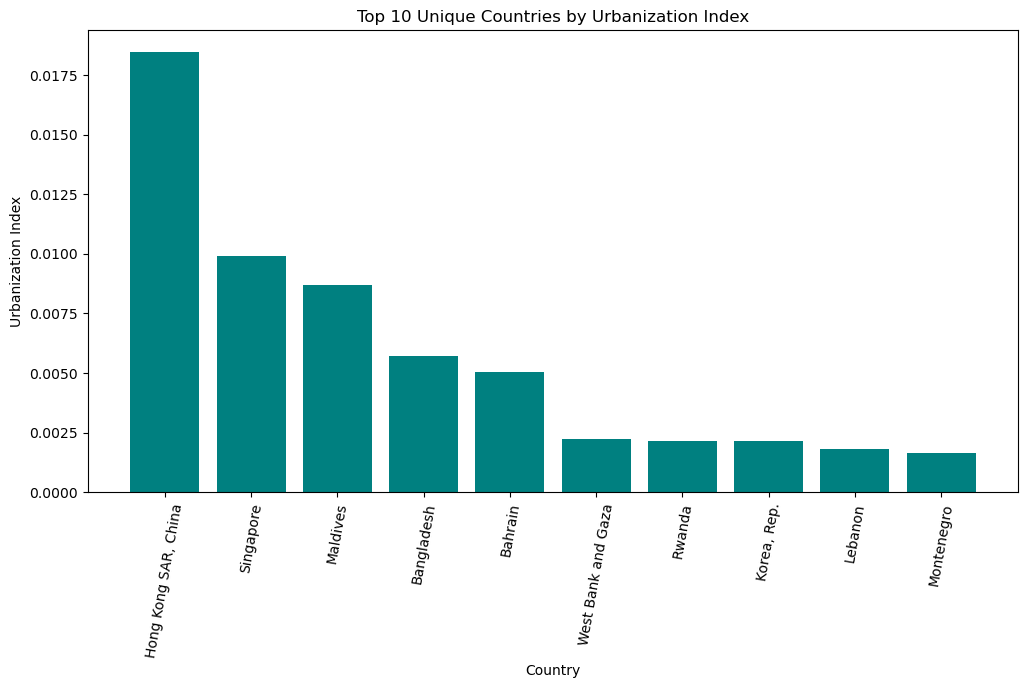

In [20]:
plt.figure(figsize=(12, 6))
plt.bar(unique_top_urbanization_index['Country'], unique_top_urbanization_index['Urbanization_Index'], color='teal')
plt.xlabel('Country')
plt.ylabel('Urbanization Index')
plt.title('Top 10 Unique Countries by Urbanization Index')
plt.xticks(rotation=80)
plt.show()

In [21]:
mean_export_percentage = interpolated_data[ 'Exports%GDP' ].mean()
mean_export_percentage

37.58169355267686

In [22]:
high_export_countries = list(filter(
    lambda x: x[1] > mean_export_percentage, 
    zip(interpolated_data['Country'], interpolated_data['Exports%GDP'])
))

In [23]:
high_export_countries[:10]

[('Netherlands', 45.4143864002759),
 ('Gabon', 58.8454314090627),
 ('Malaysia', 41.4837365806762),
 ('Saudi Arabia', 99.7035967580905),
 ('Kiribati', 52.6005579051561),
 ('Botswana', 38.8315137208616),
 ('Guyana', 52.1867245657568),
 ('Belgium', 48.0319438554395),
 ('Panama', 53.5747745812061),
 ('Eswatini', 70.3896103896104)]

In [24]:
high_export_countries_df = pd.DataFrame(high_export_countries, columns=['Country' , 'Exports (% of GDP)'])
high_export_countries_df.head()

,Country,Exports (% of GDP)
0,Netherlands,45.414386
1,Gabon,58.845431
2,Malaysia,41.483737
3,Saudi Arabia,99.703597
4,Kiribati,52.600558


In [25]:
high_export_countries_df_sorted = high_export_countries_df.sort_values(by= 'Exports (% of GDP)' , ascending= False ).drop_duplicates(subset=[ 'Country' ]).head( 10 )
high_export_countries_df_sorted

,Country,Exports (% of GDP)
1793,Singapore,228.993771
2147,"Hong Kong SAR, China",221.610060
2817,Luxembourg,211.433432
2760,Malta,178.335328
2674,Djibouti,166.717746
246,Maldives,166.363502
700,Antigua and Barbuda,143.214046
2786,Ireland,134.414793
228,Bahrain,131.129680
689,Guyana,125.748453


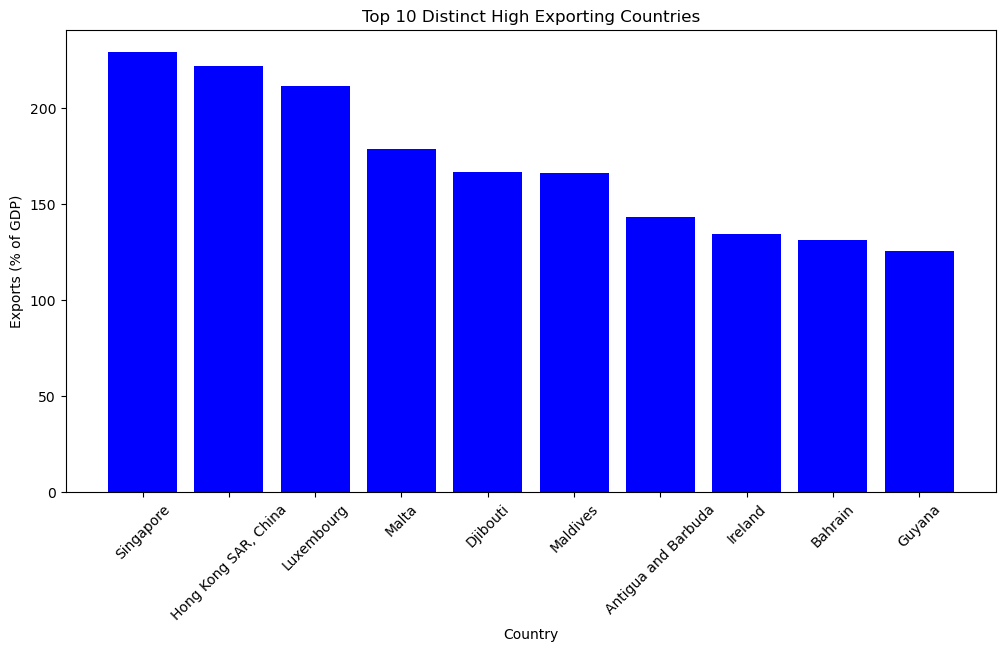

In [26]:
plt.figure(figsize=(12, 6))
plt.bar(high_export_countries_df_sorted['Country'], high_export_countries_df_sorted['Exports (% of GDP)'], color='blue')
plt.xlabel('Country')
plt.ylabel('Exports (% of GDP)')
plt.title('Top 10 Distinct High Exporting Countries')
plt.xticks(rotation=45)
plt.show()